In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation
import scipy.stats as st


import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc


**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [2]:

[X_train,y_train,S_train,X_test,y_test,S_test]=W2Rmisc.Get_n_Treat_MNIST_srt()

#for i in range(0,5):
#  W2Rmisc.show_MNIST_image(i,X_train,y_train,S_train)


**Training phase with or without the W2 regulatization.**

In [3]:

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print('Device is',DEVICE)

Device is cpu


In [5]:
EPOCHS_in = 2
BATCH_SIZE_in = 200



#without regularisation

lambdavar=0.0000000001  #visualisation of the evolution of W2 during the gradient descent will be impossible if lambdavar = 0

model_no_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - without reg')
Lists_Results_noreg=W2Rcore.W2R_fit(model_no_reg,X_train,y_train, S_train, lambdavar, f_loss_attach=nn.BCELoss() , EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

#with regularisation

lambdavar=0.00001

model_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - with reg')
Lists_Results_reg=W2Rcore.W2R_fit(model_reg,X_train,y_train, S_train, lambdavar, f_loss_attach=nn.BCELoss(), EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)



Run training - without reg
epoch 0 -- batchNb 1: Acc=0.7029176354408264 -- W2=5.37021175548184e-05 --  lambda=1e-10
epoch 0 -- batchNb 2: Acc=0.6841291189193726 -- W2=0.00014052515458239968 --  lambda=1e-10
epoch 0 -- batchNb 3: Acc=0.6749547719955444 -- W2=0.00017891971812542679 --  lambda=1e-10
epoch 0 -- batchNb 4: Acc=0.6731607913970947 -- W2=0.00011819338503792423 --  lambda=1e-10
epoch 0 -- batchNb 5: Acc=0.6449927687644958 -- W2=0.000230964200672798 --  lambda=1e-10
epoch 0 -- batchNb 6: Acc=0.6465973854064941 -- W2=0.0003988702543169381 --  lambda=1e-10
epoch 0 -- batchNb 7: Acc=0.6401493549346924 -- W2=0.00014462564108005775 --  lambda=1e-10
epoch 0 -- batchNb 8: Acc=0.6361877918243408 -- W2=0.0007414916255868778 --  lambda=1e-10
epoch 0 -- batchNb 9: Acc=0.6384640336036682 -- W2=0.0010229348563952495 --  lambda=1e-10
epoch 0 -- batchNb 10: Acc=0.6096922159194946 -- W2=0.0008588659297648071 --  lambda=1e-10
epoch 0 -- batchNb 11: Acc=0.599911093711853 -- W2=0.00088364245662362

epoch 0 -- batchNb 92: Acc=0.18262937664985657 -- W2=0.006721677793357361 --  lambda=1e-10
epoch 0 -- batchNb 93: Acc=0.24047090113162994 -- W2=0.011431565329761417 --  lambda=1e-10
epoch 0 -- batchNb 94: Acc=0.19722695648670197 -- W2=0.01467932980031561 --  lambda=1e-10
epoch 0 -- batchNb 95: Acc=0.2140273153781891 -- W2=0.010936261661889657 --  lambda=1e-10
epoch 0 -- batchNb 96: Acc=0.20692326128482819 -- W2=0.01054562361914313 --  lambda=1e-10
epoch 0 -- batchNb 97: Acc=0.19084540009498596 -- W2=0.011187682724678183 --  lambda=1e-10
epoch 0 -- batchNb 98: Acc=0.13941076397895813 -- W2=0.021631333876892533 --  lambda=1e-10
epoch 0 -- batchNb 99: Acc=0.2444862723350525 -- W2=0.015283003812135987 --  lambda=1e-10
epoch 0 -- batchNb 100: Acc=0.1480250507593155 -- W2=0.03724577504055082 --  lambda=1e-10
epoch 0 -- batchNb 101: Acc=0.1616077572107315 -- W2=0.04309047910155961 --  lambda=1e-10
epoch 0 -- batchNb 102: Acc=0.21956925094127655 -- W2=0.0264320293083542 --  lambda=1e-10
epoch 

epoch 0 -- batchNb 182: Acc=0.09966207295656204 -- W2=0.0753714365225866 --  lambda=1e-10
epoch 0 -- batchNb 183: Acc=0.18666499853134155 -- W2=0.030031732309310222 --  lambda=1e-10
epoch 0 -- batchNb 184: Acc=0.1088404580950737 -- W2=0.02258697786097774 --  lambda=1e-10
epoch 0 -- batchNb 185: Acc=0.1083657294511795 -- W2=0.02763840371844406 --  lambda=1e-10
epoch 0 -- batchNb 186: Acc=0.13868585228919983 -- W2=0.022708115769709547 --  lambda=1e-10
epoch 0 -- batchNb 187: Acc=0.10317748039960861 -- W2=0.059009403266530036 --  lambda=1e-10
epoch 0 -- batchNb 188: Acc=0.13835152983665466 -- W2=0.05417578712030302 --  lambda=1e-10
epoch 0 -- batchNb 189: Acc=0.11810755729675293 -- W2=0.006251959128351914 --  lambda=1e-10
epoch 0 -- batchNb 190: Acc=0.13721893727779388 -- W2=0.014149356599574281 --  lambda=1e-10
epoch 0 -- batchNb 191: Acc=0.16928690671920776 -- W2=0.06397142364444885 --  lambda=1e-10
epoch 0 -- batchNb 192: Acc=0.19930116832256317 -- W2=0.03858417491758859 --  lambda=1e-

epoch 0 -- batchNb 272: Acc=0.11721429973840714 -- W2=0.014098353560976218 --  lambda=1e-10
epoch 0 -- batchNb 273: Acc=0.20147237181663513 -- W2=0.019255458772599043 --  lambda=1e-10
epoch 0 -- batchNb 274: Acc=0.0964638888835907 -- W2=0.004445434363502254 --  lambda=1e-10
epoch 0 -- batchNb 275: Acc=0.19541135430335999 -- W2=0.027300421038406464 --  lambda=1e-10
epoch 0 -- batchNb 276: Acc=0.1658732295036316 -- W2=0.016702448885769217 --  lambda=1e-10
epoch 0 -- batchNb 277: Acc=0.08824961632490158 -- W2=0.012176798198232364 --  lambda=1e-10
epoch 0 -- batchNb 278: Acc=0.11912080645561218 -- W2=0.0030438187235450054 --  lambda=1e-10
epoch 0 -- batchNb 279: Acc=0.11721143871545792 -- W2=0.053501582504555945 --  lambda=1e-10
epoch 0 -- batchNb 280: Acc=0.10887942463159561 -- W2=0.01490074990478929 --  lambda=1e-10
epoch 0 -- batchNb 281: Acc=0.11755824089050293 -- W2=0.047425904349529535 --  lambda=1e-10
epoch 0 -- batchNb 282: Acc=0.0982874408364296 -- W2=0.04051729004389548 --  lambd

epoch 1 -- batchNb 64: Acc=0.12973029911518097 -- W2=0.036308588514250006 --  lambda=1e-10
epoch 1 -- batchNb 65: Acc=0.04398456960916519 -- W2=0.03281327683526958 --  lambda=1e-10
epoch 1 -- batchNb 66: Acc=0.12260951846837997 -- W2=0.07712456541464352 --  lambda=1e-10
epoch 1 -- batchNb 67: Acc=0.12898021936416626 -- W2=0.11374959134335949 --  lambda=1e-10
epoch 1 -- batchNb 68: Acc=0.04400474950671196 -- W2=0.0516604163960932 --  lambda=1e-10
epoch 1 -- batchNb 69: Acc=0.10704892128705978 -- W2=0.02290393135567781 --  lambda=1e-10
epoch 1 -- batchNb 70: Acc=0.1291937232017517 -- W2=0.11569275919220967 --  lambda=1e-10
epoch 1 -- batchNb 71: Acc=0.07354211062192917 -- W2=0.0678793696598512 --  lambda=1e-10
epoch 1 -- batchNb 72: Acc=0.08047442138195038 -- W2=0.09662039397728694 --  lambda=1e-10
epoch 1 -- batchNb 73: Acc=0.08608528971672058 -- W2=0.016158255289333567 --  lambda=1e-10
epoch 1 -- batchNb 74: Acc=0.12992200255393982 -- W2=0.07543523097841565 --  lambda=1e-10
epoch 1 -- 

epoch 1 -- batchNb 155: Acc=0.12681418657302856 -- W2=0.0758144762247337 --  lambda=1e-10
epoch 1 -- batchNb 156: Acc=0.05103345215320587 -- W2=0.08739455339967783 --  lambda=1e-10
epoch 1 -- batchNb 157: Acc=0.10846135020256042 -- W2=0.0433565206306441 --  lambda=1e-10
epoch 1 -- batchNb 158: Acc=0.07470227032899857 -- W2=0.0320039849656395 --  lambda=1e-10
epoch 1 -- batchNb 159: Acc=0.06264065951108932 -- W2=0.10543572091792353 --  lambda=1e-10
epoch 1 -- batchNb 160: Acc=0.09415939450263977 -- W2=0.03882492851520203 --  lambda=1e-10
epoch 1 -- batchNb 161: Acc=0.0641375184059143 -- W2=0.09936991333947542 --  lambda=1e-10
epoch 1 -- batchNb 162: Acc=0.07890405505895615 -- W2=0.04315268628540814 --  lambda=1e-10
epoch 1 -- batchNb 163: Acc=0.03152661398053169 -- W2=0.12552049677427846 --  lambda=1e-10
epoch 1 -- batchNb 164: Acc=0.08401036262512207 -- W2=0.059141784351790516 --  lambda=1e-10
epoch 1 -- batchNb 165: Acc=0.10579699277877808 -- W2=0.039102722795836264 --  lambda=1e-10
e

epoch 1 -- batchNb 245: Acc=0.09045788645744324 -- W2=0.05645912556917487 --  lambda=1e-10
epoch 1 -- batchNb 246: Acc=0.054343823343515396 -- W2=0.015289097028345355 --  lambda=1e-10
epoch 1 -- batchNb 247: Acc=0.09864150732755661 -- W2=0.09197087535994797 --  lambda=1e-10
epoch 1 -- batchNb 248: Acc=0.12314214557409286 -- W2=0.0049338040163798835 --  lambda=1e-10
epoch 1 -- batchNb 249: Acc=0.06055750325322151 -- W2=0.04756380619225231 --  lambda=1e-10
epoch 1 -- batchNb 250: Acc=0.07298480719327927 -- W2=0.09944385592763894 --  lambda=1e-10
epoch 1 -- batchNb 251: Acc=0.05841900780797005 -- W2=0.03685330252772845 --  lambda=1e-10
epoch 1 -- batchNb 252: Acc=0.07215222716331482 -- W2=0.011784601072761802 --  lambda=1e-10
epoch 1 -- batchNb 253: Acc=0.08127463608980179 -- W2=0.07217012577831472 --  lambda=1e-10
epoch 1 -- batchNb 254: Acc=0.10927625745534897 -- W2=0.022368493775987153 --  lambda=1e-10
epoch 1 -- batchNb 255: Acc=0.0920940414071083 -- W2=0.042192581893585324 --  lambda

epoch 0 -- batchNb 36: Acc=0.3868909180164337 -- W2=0.0012762228607243742 --  lambda=1e-05
epoch 0 -- batchNb 37: Acc=0.3902220129966736 -- W2=0.006534158814019974 --  lambda=1e-05
epoch 0 -- batchNb 38: Acc=0.4668993055820465 -- W2=0.011841768099429826 --  lambda=1e-05
epoch 0 -- batchNb 39: Acc=0.39231833815574646 -- W2=0.005621306442549211 --  lambda=1e-05
epoch 0 -- batchNb 40: Acc=0.3266379237174988 -- W2=0.00258291823485024 --  lambda=1e-05
epoch 0 -- batchNb 41: Acc=0.3844241201877594 -- W2=0.007118044464959893 --  lambda=1e-05
epoch 0 -- batchNb 42: Acc=0.37202489376068115 -- W2=0.009573050618882917 --  lambda=1e-05
epoch 0 -- batchNb 43: Acc=0.4017057418823242 -- W2=0.012311166130984928 --  lambda=1e-05
epoch 0 -- batchNb 44: Acc=0.3702041506767273 -- W2=0.0029824487768337344 --  lambda=1e-05
epoch 0 -- batchNb 45: Acc=0.33755359053611755 -- W2=0.006567716326344452 --  lambda=1e-05
epoch 0 -- batchNb 46: Acc=0.3623752295970917 -- W2=0.006009454267541513 --  lambda=1e-05
epoch 

epoch 0 -- batchNb 127: Acc=0.17602196335792542 -- W2=0.026684631393436572 --  lambda=1e-05
epoch 0 -- batchNb 128: Acc=0.26031598448753357 -- W2=0.03628850322456856 --  lambda=1e-05
epoch 0 -- batchNb 129: Acc=0.2796238958835602 -- W2=0.03518242976952024 --  lambda=1e-05
epoch 0 -- batchNb 130: Acc=0.17501072585582733 -- W2=0.044145596689304505 --  lambda=1e-05
epoch 0 -- batchNb 131: Acc=0.2150096744298935 -- W2=0.007985772754182108 --  lambda=1e-05
epoch 0 -- batchNb 132: Acc=0.23390598595142365 -- W2=0.022608264771406535 --  lambda=1e-05
epoch 0 -- batchNb 133: Acc=0.15532131493091583 -- W2=0.003414767846265931 --  lambda=1e-05
epoch 0 -- batchNb 134: Acc=0.20471438765525818 -- W2=0.016611488717899192 --  lambda=1e-05
epoch 0 -- batchNb 135: Acc=0.18831832706928253 -- W2=0.024361858663723975 --  lambda=1e-05
epoch 0 -- batchNb 136: Acc=0.17208260297775269 -- W2=0.005238745615088192 --  lambda=1e-05
epoch 0 -- batchNb 137: Acc=0.21987058222293854 -- W2=0.008734354395301125 --  lambd

epoch 0 -- batchNb 217: Acc=0.1880737841129303 -- W2=0.020808019485230034 --  lambda=1e-05
epoch 0 -- batchNb 218: Acc=0.1796627789735794 -- W2=0.006449285194776166 --  lambda=1e-05
epoch 0 -- batchNb 219: Acc=0.14642606675624847 -- W2=0.014951302773624773 --  lambda=1e-05
epoch 0 -- batchNb 220: Acc=0.09439747780561447 -- W2=0.058859922091869514 --  lambda=1e-05
epoch 0 -- batchNb 221: Acc=0.1920909881591797 -- W2=0.007960950654251064 --  lambda=1e-05
epoch 0 -- batchNb 222: Acc=0.14015552401542664 -- W2=0.09540348173686651 --  lambda=1e-05
epoch 0 -- batchNb 223: Acc=0.13292533159255981 -- W2=0.022755783390948633 --  lambda=1e-05
epoch 0 -- batchNb 224: Acc=0.09461064636707306 -- W2=0.016005516556560906 --  lambda=1e-05
epoch 0 -- batchNb 225: Acc=0.11443890631198883 -- W2=0.04755269742418022 --  lambda=1e-05
epoch 0 -- batchNb 226: Acc=0.12343001365661621 -- W2=0.0749771118080389 --  lambda=1e-05
epoch 0 -- batchNb 227: Acc=0.13779665529727936 -- W2=0.028071235647075806 --  lambda=1

epoch 1 -- batchNb 8: Acc=0.08192351460456848 -- W2=0.025688490268294114 --  lambda=1e-05
epoch 1 -- batchNb 9: Acc=0.09199345856904984 -- W2=0.03093519183039461 --  lambda=1e-05
epoch 1 -- batchNb 10: Acc=0.09095192700624466 -- W2=0.010872311406728839 --  lambda=1e-05
epoch 1 -- batchNb 11: Acc=0.11029414087533951 -- W2=0.01790367178955421 --  lambda=1e-05
epoch 1 -- batchNb 12: Acc=0.13014832139015198 -- W2=0.015733209579593677 --  lambda=1e-05
epoch 1 -- batchNb 13: Acc=0.12789173424243927 -- W2=0.012290306017348483 --  lambda=1e-05
epoch 1 -- batchNb 14: Acc=0.0642659142613411 -- W2=0.024259102815449293 --  lambda=1e-05
epoch 1 -- batchNb 15: Acc=0.11697664856910706 -- W2=0.05762096293437934 --  lambda=1e-05
epoch 1 -- batchNb 16: Acc=0.10058555006980896 -- W2=0.028329529300208375 --  lambda=1e-05
epoch 1 -- batchNb 17: Acc=0.10728920251131058 -- W2=0.012446604102933632 --  lambda=1e-05
epoch 1 -- batchNb 18: Acc=0.18387329578399658 -- W2=0.0344961193832205 --  lambda=1e-05
epoch 1

epoch 1 -- batchNb 99: Acc=0.0917365774512291 -- W2=0.008777644211477309 --  lambda=1e-05
epoch 1 -- batchNb 100: Acc=0.07433754205703735 -- W2=0.00811042539794471 --  lambda=1e-05
epoch 1 -- batchNb 101: Acc=0.07966413348913193 -- W2=0.014644636792127129 --  lambda=1e-05
epoch 1 -- batchNb 102: Acc=0.0631997138261795 -- W2=0.012403495475155067 --  lambda=1e-05
epoch 1 -- batchNb 103: Acc=0.10299112647771835 -- W2=0.012815974059776634 --  lambda=1e-05
epoch 1 -- batchNb 104: Acc=0.08638758957386017 -- W2=0.0583525945785368 --  lambda=1e-05
epoch 1 -- batchNb 105: Acc=0.0857001468539238 -- W2=0.011803096100493347 --  lambda=1e-05
epoch 1 -- batchNb 106: Acc=0.13178259134292603 -- W2=0.03581954501896689 --  lambda=1e-05
epoch 1 -- batchNb 107: Acc=0.11197581887245178 -- W2=0.031898429142529494 --  lambda=1e-05
epoch 1 -- batchNb 108: Acc=0.14021055400371552 -- W2=0.02659214146660815 --  lambda=1e-05
epoch 1 -- batchNb 109: Acc=0.10976845026016235 -- W2=0.008731291956109999 --  lambda=1e-

epoch 1 -- batchNb 189: Acc=0.07718323916196823 -- W2=0.004599423419904269 --  lambda=1e-05
epoch 1 -- batchNb 190: Acc=0.09441345930099487 -- W2=0.01967501788158188 --  lambda=1e-05
epoch 1 -- batchNb 191: Acc=0.07325484603643417 -- W2=0.08658394676785973 --  lambda=1e-05
epoch 1 -- batchNb 192: Acc=0.16010858118534088 -- W2=0.009987860494220513 --  lambda=1e-05
epoch 1 -- batchNb 193: Acc=0.16064485907554626 -- W2=0.019706892828708078 --  lambda=1e-05
epoch 1 -- batchNb 194: Acc=0.10945959389209747 -- W2=0.04028587738957867 --  lambda=1e-05
epoch 1 -- batchNb 195: Acc=0.09612330794334412 -- W2=0.0327479824591137 --  lambda=1e-05
epoch 1 -- batchNb 196: Acc=0.07585340738296509 -- W2=0.026408858389004305 --  lambda=1e-05
epoch 1 -- batchNb 197: Acc=0.08107417821884155 -- W2=0.025204309395121523 --  lambda=1e-05
epoch 1 -- batchNb 198: Acc=0.1077098473906517 -- W2=0.035284327282170125 --  lambda=1e-05
epoch 1 -- batchNb 199: Acc=0.11401066929101944 -- W2=0.03495497367111966 --  lambda=1

epoch 1 -- batchNb 279: Acc=0.08362677693367004 -- W2=0.0729276109723287 --  lambda=1e-05
epoch 1 -- batchNb 280: Acc=0.09251679480075836 -- W2=0.010073878087268895 --  lambda=1e-05
epoch 1 -- batchNb 281: Acc=0.12304715067148209 -- W2=0.026832896082851217 --  lambda=1e-05
epoch 1 -- batchNb 282: Acc=0.13667592406272888 -- W2=0.015514352469381263 --  lambda=1e-05
epoch 1 -- batchNb 283: Acc=0.08100440353155136 -- W2=0.03343270407185628 --  lambda=1e-05
epoch 1 -- batchNb 284: Acc=0.0632668137550354 -- W2=0.018849162586320745 --  lambda=1e-05
epoch 1 -- batchNb 285: Acc=0.06653972715139389 -- W2=0.025364516886838825 --  lambda=1e-05
epoch 1 -- batchNb 286: Acc=0.1327827125787735 -- W2=0.021943768047094633 --  lambda=1e-05
epoch 1 -- batchNb 287: Acc=0.10728640854358673 -- W2=0.006316201250911035 --  lambda=1e-05
epoch 1 -- batchNb 288: Acc=0.08572693169116974 -- W2=0.022071182570471134 --  lambda=1e-05
epoch 1 -- batchNb 289: Acc=0.07666444033384323 -- W2=0.018578575122774055 --  lambda

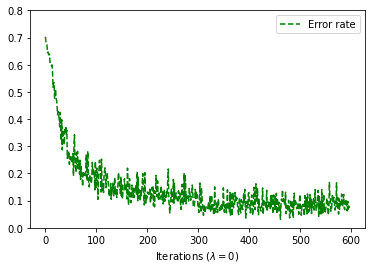

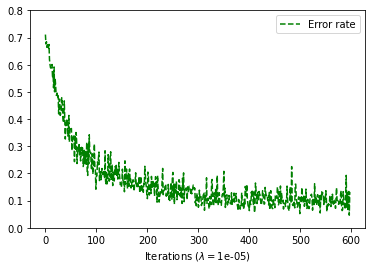

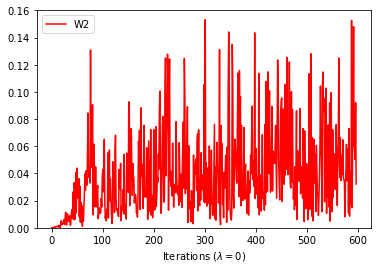

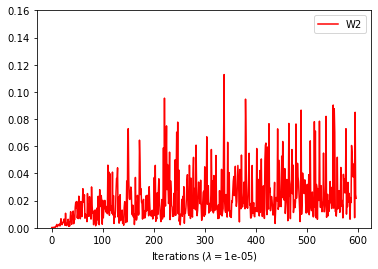

In [9]:
plt.figure()
plt.plot(Lists_Results_noreg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.ylim((0.,0.8))
plt.savefig('Convergence_attach_noreg.pdf')


plt.figure()
plt.plot(Lists_Results_reg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.ylim((0.,0.8))
plt.savefig('Convergence_attach_'+str(lambdavar)+'.pdf')


plt.figure()
plt.plot(np.array(Lists_Results_noreg['W2']),'r-',label='W2')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.ylim((0.,0.16))
plt.savefig('Convergence_regul_noreg.pdf')

plt.figure()
plt.plot(np.array(Lists_Results_reg['W2']),'r-',label='W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.ylim((0.,0.16))
plt.savefig('Convergence_regul_'+str(lambdavar)+'.pdf')



**Tests - without regularisation**

In [10]:

predY_test=torch.clone(W2Rmisc.LargeDatasetPred(model_no_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0371)
DI: 0.7867213890919648
s0_RatioGoodPred: 0.8854251012145749
s1_RatioGoodPred: 0.9762845849802372


**Tests - with regularisation**

In [11]:

predY_test=torch.clone(W2Rmisc.LargeDatasetPred(model_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0342)
DI: 0.9638136051546451
s0_RatioGoodPred: 0.932591093117409
s1_RatioGoodPred: 0.9699604743083003
